# Singlethreaded convolution

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from utils import load_dataset, aggregate, plot_quantiles, plot_surface, plot_common
import matplotlib.pyplot as plt
from IPython.display import Markdown

algorithm = 'convolve'
legend = "2048x2048x{n}x{n}x{n}"
method = 'mpisingle'
pd.set_option('display.max_rows', 10000)
data = load_dataset('csv', 'convolution_test_2048x2048x')
data = data[data['size'].isin([1, 2, 4, 6, 8]) & data['image_size'].isin([1, 2, 4, 6, 8, 10, 12])]

In [2]:
aggregate(data, method=method, stat='total_op', aggfunc='median', print=True)

## All measured data

size                           1          2         4         6         8
image_size round rank                                                    
1.0        0     0        1215.0     1044.0     967.0    1000.0    1154.0
                 1           NaN     1103.0     897.0    1011.0    1073.0
                 2           NaN        NaN     922.0     877.0    1029.0
                 3           NaN        NaN     965.0     962.0    1028.0
                 4           NaN        NaN       NaN     906.0    1044.0
                 5           NaN        NaN       NaN    1002.0     942.0
                 6           NaN        NaN       NaN       NaN    1069.0
                 7           NaN        NaN       NaN       NaN    1012.0
           1     0        1203.0     1018.0     878.0    1047.0    1120.0
                 1           NaN     1062.0     922.0    1008.0    1180.0
                 2           NaN        NaN     907.0     930.0    1112.0
                 3           NaN        NaN     892.0    1030.0    1187.0
                 4           NaN        NaN       NaN     976.0    1030.0
                 5           NaN        NaN       NaN     986.0    1165.0
                 6           NaN        NaN       NaN       NaN    1152.0
                 7           NaN        NaN       NaN       NaN    1199.0
           2     0        1310.0     1025.0     901.0    1054.0    1073.0
                 1           NaN     1068.0     889.0    1005.0    1126.0
                 2           NaN        NaN     873.0     950.0    1101.0
                 3           NaN        NaN     918.0    1069.0    1153.0
                 4           NaN        NaN       NaN     979.0    1061.0
                 5           NaN        NaN       NaN    1010.0    1111.0
                 6           NaN        NaN       NaN       NaN    1084.0
                 7           NaN        NaN       NaN       NaN    1141.0
           3     0        1323.0     1015.0     893.0    1009.0    1097.0
                 1           NaN     1060.0     888.0     989.0    1035.0
                 2           NaN        NaN     864.0     906.0     959.0
                 3           NaN        NaN     917.0    1030.0    1084.0
                 4           NaN        NaN       NaN     950.0    1047.0
                 5           NaN        NaN       NaN     973.0    1020.0
                 6           NaN        NaN       NaN       NaN    1006.0
                 7           NaN        NaN       NaN       NaN    1109.0
           4     0        1320.0     1050.0     877.0     924.0    1012.0
                 1           NaN     1096.0     861.0     930.0     975.0
                 2           NaN        NaN     850.0     882.0    1025.0
                 3           NaN        NaN     889.0     951.0    1005.0
                 4           NaN        NaN       NaN     884.0    1066.0
                 5           NaN        NaN       NaN     908.0     989.0
                 6           NaN        NaN       NaN       NaN    1037.0
                 7           NaN        NaN       NaN       NaN    1060.0
           5     0        1181.0     1049.0     870.0     928.0    1080.0
                 1           NaN     1091.0     878.0     941.0     987.0
                 2           NaN        NaN     901.0     982.0    1056.0
                 3           NaN        NaN     847.0     949.0    1015.0
                 4           NaN        NaN       NaN     969.0    1027.0
                 5           NaN        NaN       NaN     992.0    1002.0
                 6           NaN        NaN       NaN       NaN    1042.0
                 7           NaN        NaN       NaN       NaN    1069.0
           6     0        1328.0     1021.0     883.0     989.0     993.0
                 1           NaN     1065.0     845.0     970.0    1044.0
                 2           NaN        NaN     871.0     887.0    1022.0
                 3           NaN        NaN     913.0    1007.0    1088.0
    

## Max node time for each run/round

size                    1        2       4       6       8
image_size round                                          
1.0        0         1215     1103     967    1011    1154
           1         1203     1062     922    1047    1199
           2         1310     1068     918    1069    1153
           3         1323     1060     917    1030    1109
           4         1320     1096     889     951    1066
           5         1181     1091     901     992    1080
           6         1328     1065     913    1007    1088
           7         1208     1051     869    1048    1075
           8         1253     1061     890     999    1070
           9         1176     1081     902    1058    1049
2.0        0        11906     6267    3637    3036    2530
           1        11756     6127    3470    2988    2295
           2        11530     6169    3479    3026    2365
           3        11606     6241    3275    2951    2307
           4        11579     6214    3628    3007    2300
           5        11621     5808    3502    3043    2641
           6        11648     6145    3691    2975    2768
           7        11500     6113    3661    3022    3016
           8        11160     6306    3691    3031   14268
           9        12057     6098    3479    3006   12822
4.0        0        94917    47687   24940   17570   12882
           1        93379    48436   24398   18662   18064
           2        91263    46204   23465   18173   19056
           3        90801    46145   23816   18302   20070
           4        92433    46712   23336   18747   12983
           5        91541    46401   24141   18379   12528
           6        91667    48179   23678   18219   13421
           7        92033    46227   23629   18249   13137
           8        97481    46487   23679   18599   22511
           9        92789    46517   23888   18086   20843
6.0        0       309028   160342   81126   53329   41119
           1       308041   155840   81851   61657   50643
           2       309269   154975   79566   61014   41615
           3       308988   155131   78668   65845   41293
           4       311262   158407   81734   60674   60622
           5       307742   156992   80797   60412   60290
           6       308972   156479   80366   60991   85674
           7       325099   156141   79521   60533   51157
           8       322646   161873   78979   61172   62782
           9       318040   155147   79105   61354   53236
8.0        0       791219   381485  193165  135643   99747
           1       727395   369381  192125  143601   98145
           2       734919   384713  189693  146261  109946
           3       729161   382178  201442  150795  111374
           4       737093   375303  188654  144553  101842
           5       741647   366376  187258  150041  102997
           6       732565   376332  193513  146271  105274
           7       743526   378914  185835  143567  101996
           8       751205   390547  193995  143301  104984
           9       735090   386601  193818  144671   96531
10.0       0      1525120   743933  368182  255438  190894
           1      1437261   728326  366142  280788  195970
           2      1423547   722316  361730  283819  193939
           3      1453143   748243  368672  255041  195993
           4      1437257   721488  373927  254243  186378
           5      1442766   714983  402059  263597  201510
           6      1431754   733334  370004  262376  191115
           7      1430121   719213  368629  276293  200574
           8      1454032   725744  366171  258206  189212
           9      1491620   729823  365187  250580  203940
12.0       0      2469046  1278617  639845  438089  328774
           1      2499189  1247021  627089  425607  342767
           2      2463398  1318983  629703  436807  325322
           3      2465900  1266295  626124  460129  321335
           4      2478338  1390767  650070  443885  341821
           5      2472487  1249747  629998  437

size,1,2,4,6,8
image_size,,,,,
1.0,10,10,10,10,10
2.0,10,10,10,10,10
4.0,10,10,10,10,10
6.0,10,10,10,10,10
8.0,10,10,10,10,10
10.0,10,10,10,10,10
12.0,10,10,10,10,10


size,1,2,4,6,8
image_size,,,,,
1.0,1234.0,1066.5,907.5,1020.5,1084.0
2.0,11613.5,6157.0,3565.0,3014.5,2585.5
4.0,92233.0,46502.0,23747.5,18275.5,15742.5
6.0,309148.5,156310.0,79966.0,61002.5,52196.5
8.0,736091.5,380199.5,192645.0,144612.0,102496.5
10.0,1440013.5,727035.0,368405.5,260291.0,194954.5
12.0,2469276.0,1258021.0,634921.5,437837.0,328716.0


## Speedup

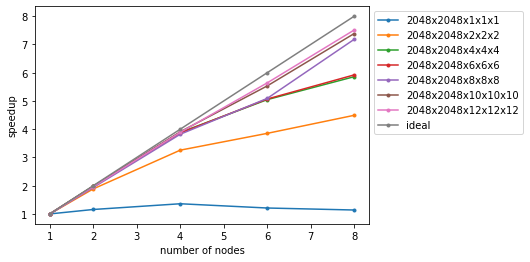

## Total time with 0.2quantile, 0.8quantile

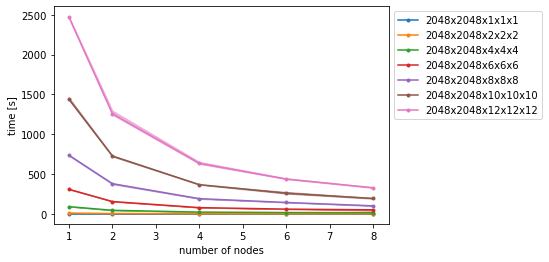

## Time as a function of image size and number of nodes

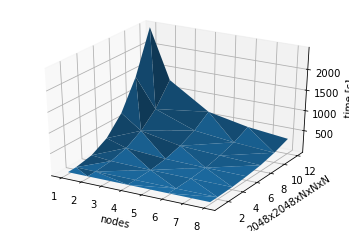

## MPI Gahering time

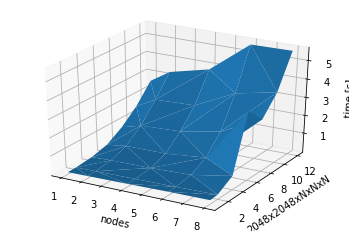

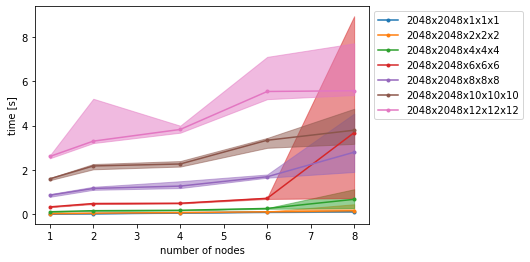

## barrier - waiting for all nodes before result transfer

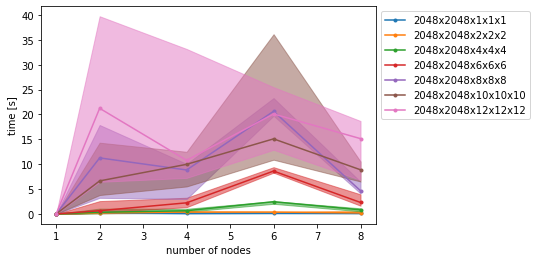

## Dataset read time

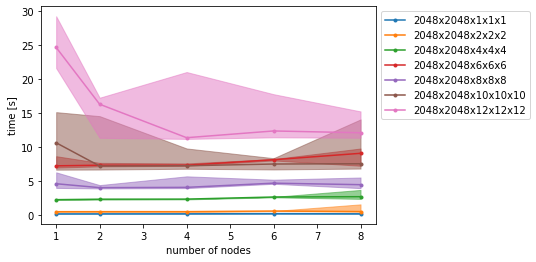

## Dataset write time

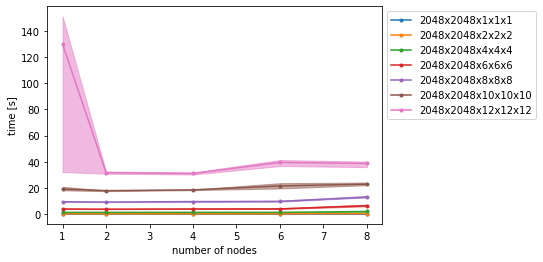

In [3]:
plot_common(data, algorithm=algorithm, method=method, legend=legend)